# GRIP: The Sparks Foundation
## Data Science and Business Analytics Intern


## TASK 2 :- Prediction using UnSupervised ML

# Iris Case Study
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

For more details visit : https://en.wikipedia.org/wiki/Iris_flower_data_set

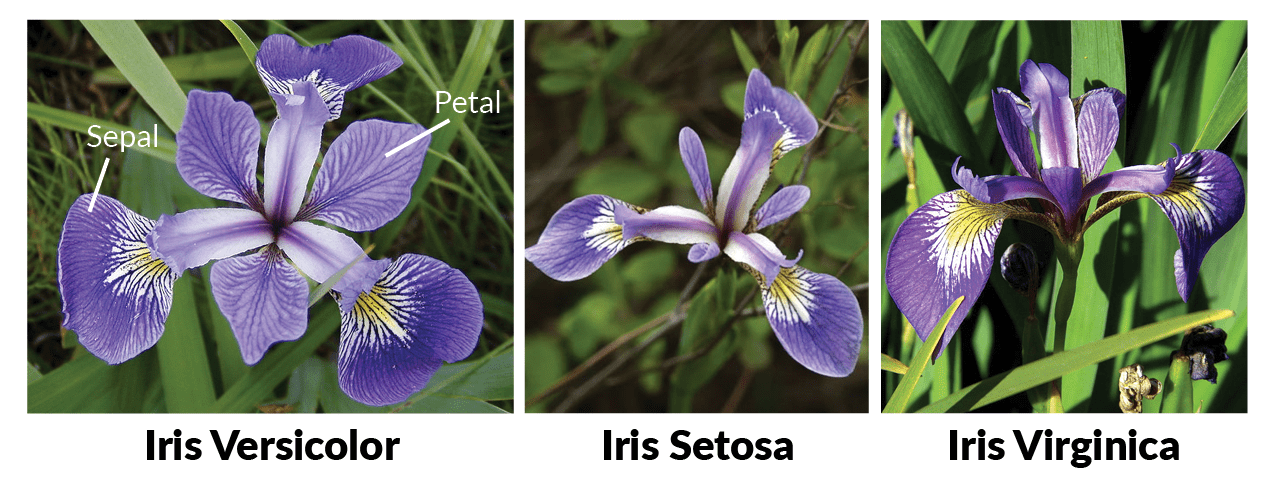

### Objective: 
Our main objective is to classify the flowers into their respective species - Iris setosa, Iris virginica and Iris versicolor by using various possible plots.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [3]:
data = pd.read_csv("F:\\Decoder\\Smritika Maam 9th Jan\\Data\\Iris.csv")
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


## Data Inspection

In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Conclusion` : As can be seen from the above info, it is a balanced dataset.

## Statistical Insights

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
#Dropping unnecessary columns
data = data.drop('Id',axis=1)
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Analysing the Dataset

### Understanding the specieswidth vs specieslength distribution using a Scatter Plot

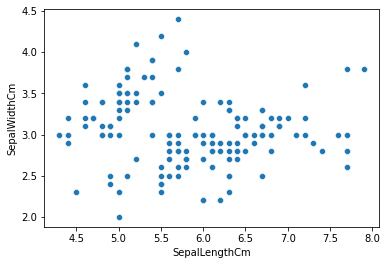

In [13]:
sns.scatterplot(data=data,x='SepalLengthCm', y='SepalWidthCm')
plt.show()

Conclusion:` The plot doesnot convey much information about the nature of distribution of the sepal length vs sepal width. Hence, we would use different colours(based on their class type) to interpret the distribution nature.

<Figure size 1440x1440 with 0 Axes>

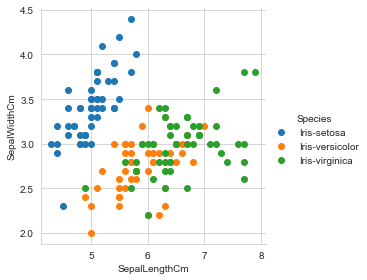

In [15]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Species", size=4).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

### `Conclusion:`

* The blue points represent the Setosa species and as seen from the graph, it can be easily seperated from the other species based on the width and length measurements.
* However, we cannot seperate the other two species i.e. Versicolor and Virginica by using the same graph as they overlap each other. Hence we would plot a pairplot to furthur analyze our data.


### `Note`:
We are using a pairplot to check all the possible combinations of graphs that can be plotted, so as to find a way out to seggregate the Versicolor and Virginica flowers as well.

<Figure size 720x720 with 0 Axes>

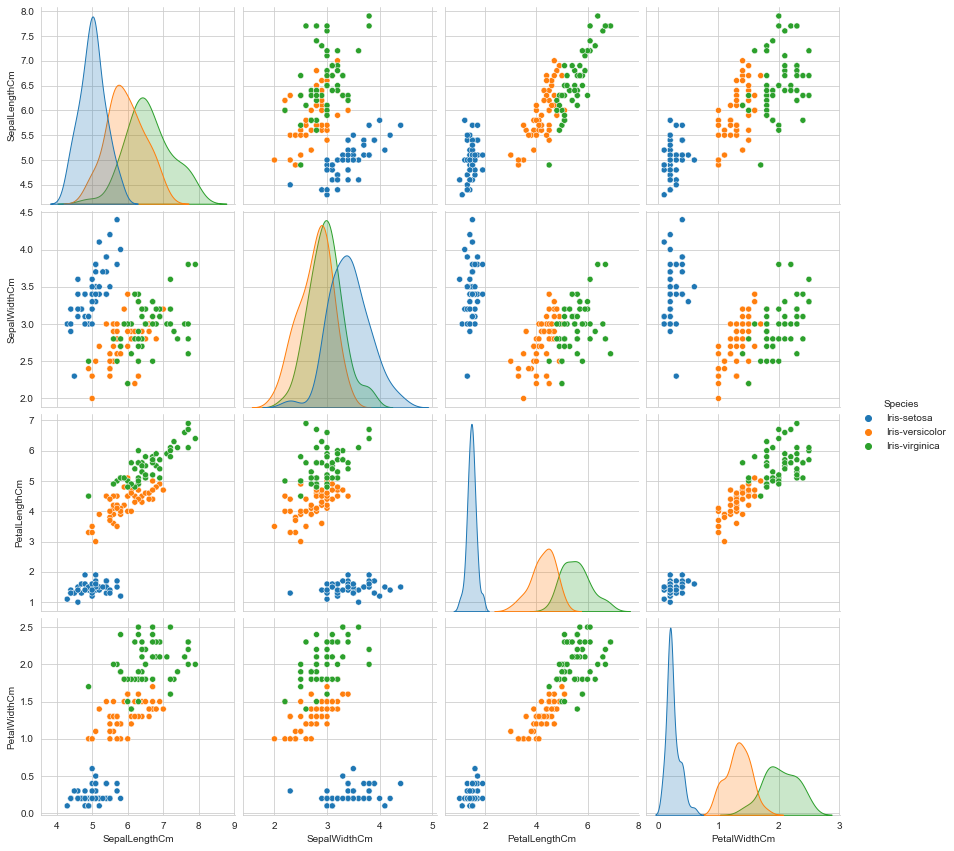

In [17]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.pairplot(data = data, hue="Species", size=3);
plt.show()

### Inferences
* The graph for Petal Width vs Petal Length shows the best results and can be used to seggregate all the three species.
* In can be clearly seen from the graph, the Setosa species can be easily seperated , on the other hand, we can see some overlaps in the case of Versicolor and Virginica , however they can be linearly seperated.

## Correlation Between the numeric variables

In [18]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Plotting the correlation using a heatmap

<AxesSubplot:>

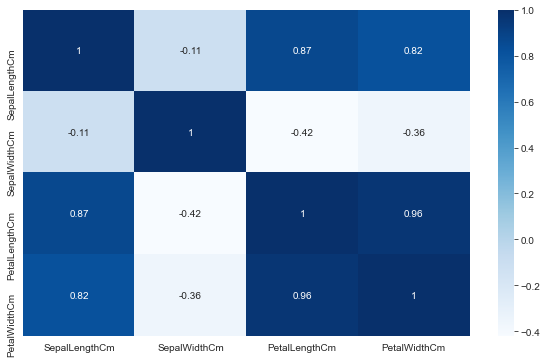

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), cmap='Blues', annot = True)

### Conclusion:

* From the graph, it can be clearly seen that the columns Petal length and petal width hold a strong correlation (=0.96). Earlier we had got the same observations while plotting a pairplot.
* Apart from this, the columns Sepal length and Petal length also hold a high corelation(=0.87).
* Sepal length and Petal width alzo hold a good correlation (=0.82).

## Observing the distribution nature of all the 4 columns (Using a Distplot)

In [20]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

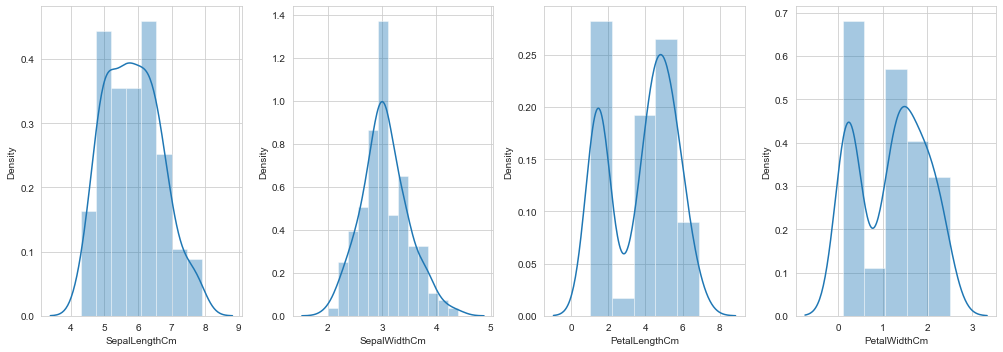

In [21]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(35,5))
i = 1
for col in cols:
    plt.subplot(1,10,i)
    sns.distplot(data[col])
    i = i+1
plt.tight_layout()
plt.show()

### Conclusion:
It can be observed from the above distplots that the distribution of the columns follow a Normal distribution

## Observing the distribution of the data across the various columns using a Histogram

In [23]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [24]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using the describe() we can see that the maximum value for the columns:

* Sepal Length = 8
* Sepal Width = 5
* Petal length = 7
* Petal Width = 3

Hence, we'll set our bin size of the histogram based on the above specified values.

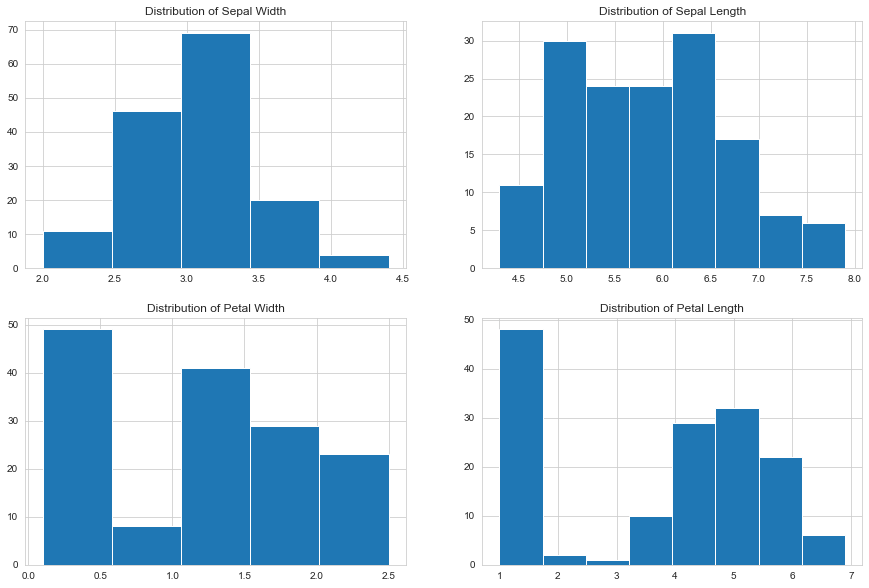

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(data['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(data['SepalLengthCm'], bins=8);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(data['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(data['PetalLengthCm'], bins=8)
plt.show()

### Conclusions:
* The highest frequency of Sepal length ranges between 6.0 - 6.5 which is around 32
* The highest frequency of Sepal Width ranges between 3.0 - 3.5 which is around 69
* The highest frequency of Petal length ranges between 1.0 - 1.8 which is around 50
* The highest frequency of Petal Width ranges between 0.0 - 0.5 which is around 50

## Univariate Analysis of all the 4 columns(using Distplots)

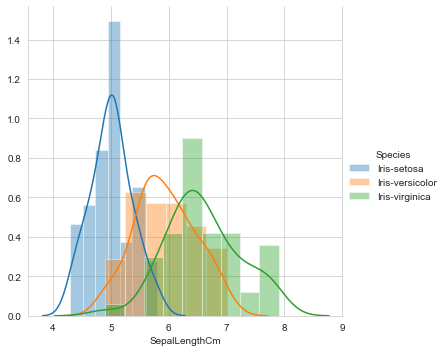

In [27]:
sns.FacetGrid(data,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend()

### Conclusion:
It can be clearly seen that the flower species cannot be seperated based on the Sepal length as the values overlap a lot.

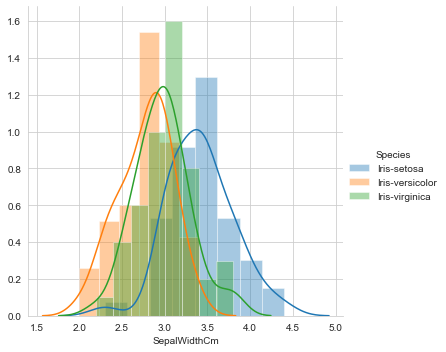

In [28]:
sns.FacetGrid(data,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend()

### Conclusion:
It can be clearly seen that the flower species cannot be seperated based on the Sepal Width as here also, the values overlap a lot. the overlapping is more intense in this case as compared to the overlapping in the case of Sepal Length.

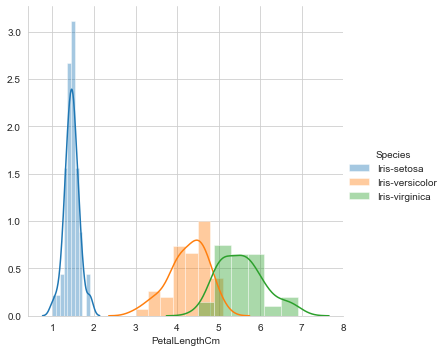

In [29]:
sns.FacetGrid(data,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend()

### Conclusion:
From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 4.5-5). The column Petal length can be used to seperate the species 

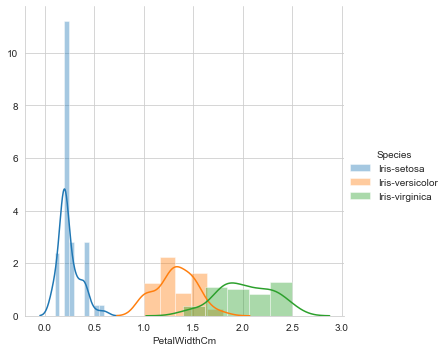

In [30]:
sns.FacetGrid(data,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend()

### Conclusion:
From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 1.5-2.0). The column Petal Width can also be used to seperate the species .

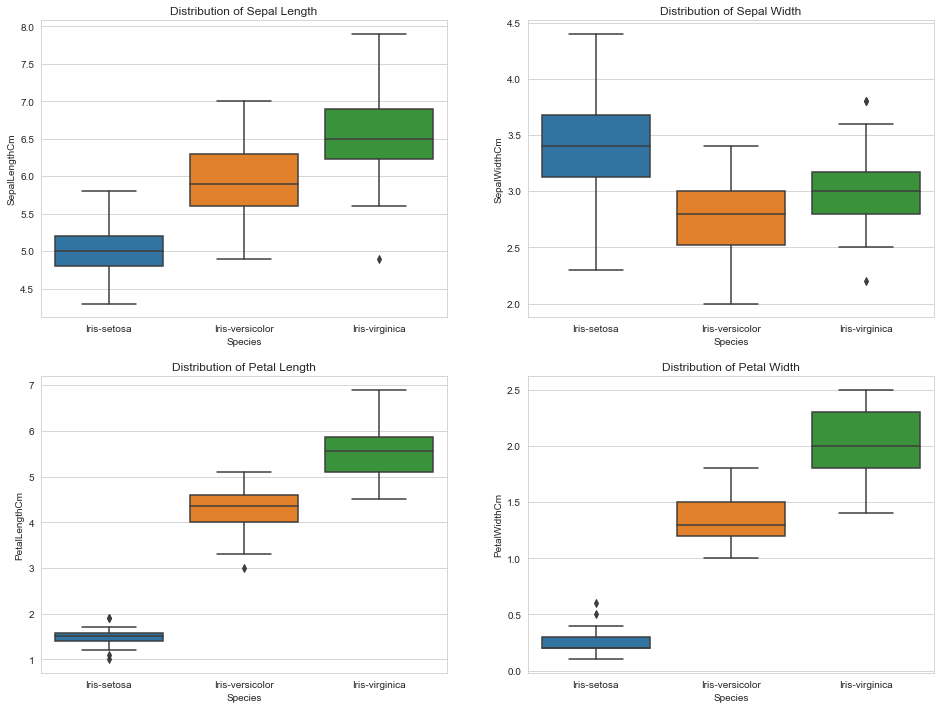

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.boxplot(y="SepalLengthCm", x= "Species", data=data,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.boxplot(y="SepalWidthCm", x= "Species", data=data,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.boxplot(y="PetalLengthCm", x= "Species", data=data,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.boxplot(y="PetalWidthCm", x= "Species", data=data,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusions:

We can see that the species Setosa doesnot have any outliers in case of Sepal Length or Sepal Width, however, it does have few outliers in Petal length and Petal Width.
In terms of features like: Petal Width / Length, Virginca has quiet high values as compared to the other two species. Also, Setosa has the least values for the same features.
It is also observed that for the feature Sepal Width, Setosa has a wide range of values as compared to the other species

### Let's Dive a lil Deeper !!
To furthur analyze the distribution we are using a violin plot.

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

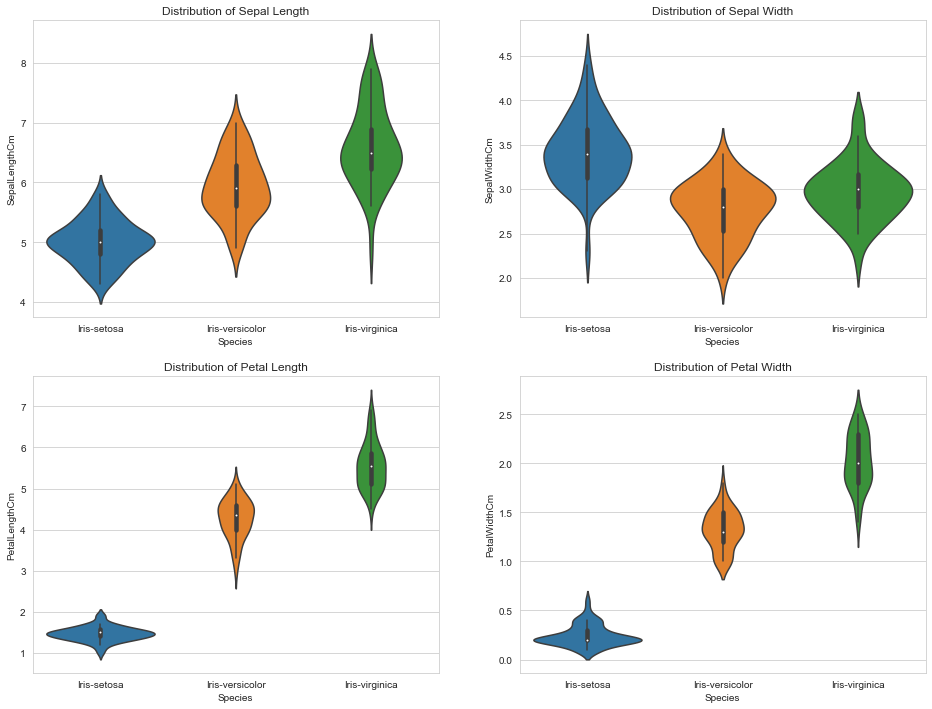

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.violinplot(y="SepalLengthCm", x= "Species", data=data,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.violinplot(y="SepalWidthCm", x= "Species", data=data,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.violinplot(y="PetalLengthCm", x= "Species", data=data,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.violinplot(y="PetalWidthCm", x= "Species", data=data,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusions:

The kernel density in the Violin plots helps us understand the full distribution of the data in terms of density.

## Final Conclusions

* The dataset is completely balanced i.e. equal number of records are present for each of the three species.
* Here our target column is Species, as we need to segregate the flowers as per their species based on the 4 fetaures namely, Sepal Length, Sepal Width, Petal Length and Petal Width .
* The columns Petal length and petal width hold a strong correlation (=0.96) and can be used to segregate the flowers.
* By plotting various graphs, we can conclude that:
* The Setosa species is easily segregable because of its small feature value range.
* The Versicolor and Virginca species are a bit difficult to seperate because they overlap at many points in terms of their features.